<a href="https://colab.research.google.com/github/Ishaang19/FML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(x,y,test_size=0.25,random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xt=sc.transform(xt)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
classifier.fit(xtr,ytr)

KNeighborsClassifier(p=1)

In [6]:
print(classifier.predict(sc.transform([[60,80000]])))

[1]


In [7]:
yp=classifier.predict(xt)
print(np.concatenate((yp.reshape(len(yp),1),yt.reshape(len(yt),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm=confusion_matrix(yt,yp)
print(cm)
accuracy_score(yt,yp)

[[50  8]
 [ 4 38]]


0.88

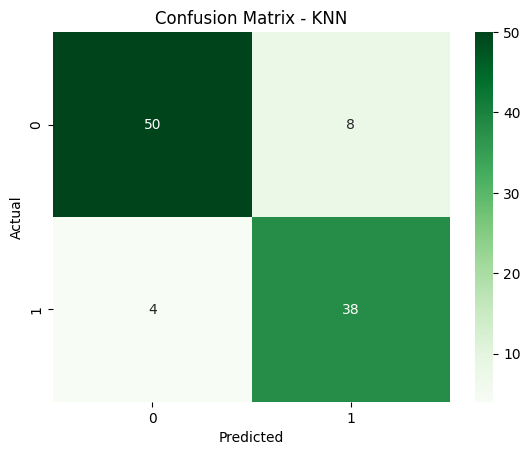

In [10]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

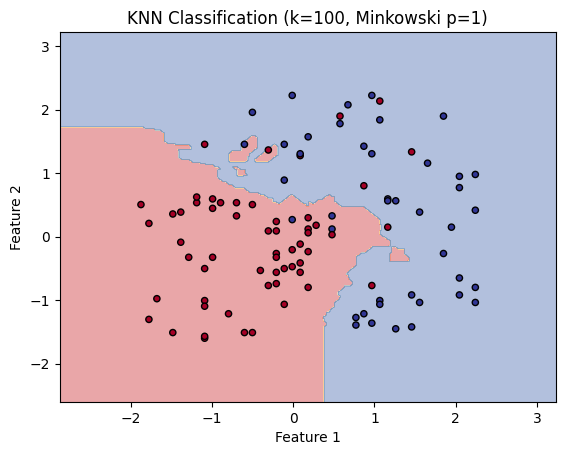

In [11]:
import matplotlib.pyplot as plt

x_min, x_max = xt[:, 0].min() - 1, xt[:, 0].max() + 1
y_min, y_max = xt[:, 1].min() - 1, xt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(xt[:, 0], xt[:, 1], c=yt, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('KNN Classification (k=100, Minkowski p=1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [12]:
from scipy.spatial import distance
x=[3,6,9]
y=[1,0,1]
print(distance.minkowski(x,y))

10.198039027185569
